In [106]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [107]:
df = pd.read_csv("TSLA.csv")

In [108]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [109]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


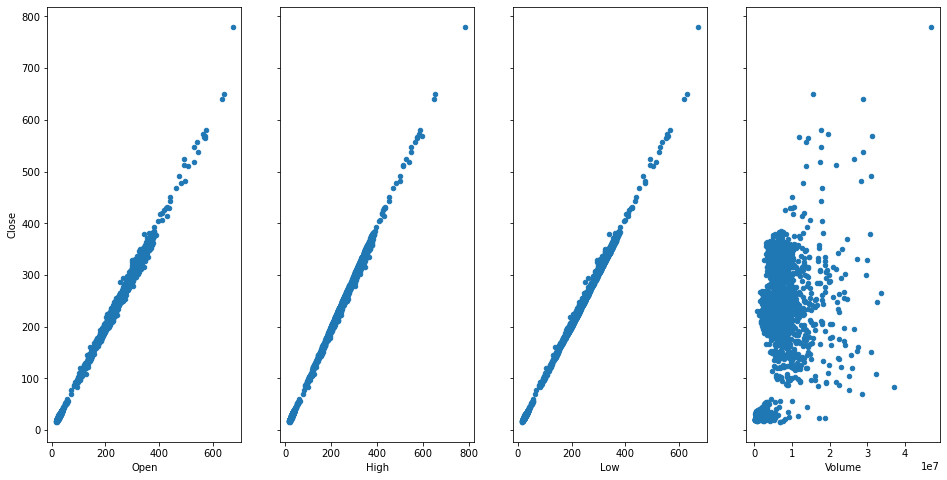

In [111]:
fig,axs = plt.subplots(1,4, sharey=True)
df.plot(kind="scatter", x="Open", y="Close", ax=axs[0], figsize=(16,8))
df.plot(kind="scatter", x="High", y="Close", ax=axs[1])
df.plot(kind="scatter", x="Low", y="Close", ax=axs[2])
df.plot(kind="scatter", x="Volume", y="Close", ax=axs[3]);

In [112]:
features = ["Open", "High", "Low", "Volume"]
target = "Close"

In [113]:
X = df[features]
y = df[target]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [115]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [116]:
y_pred = model.predict(X_test)
y_pred = pd.Series(y_pred)


In [117]:
r2_score(y_test, y_pred)

0.9997117604197283

In [123]:
mean_squared_error(y_test, y_pred)

4.379434894643297

In [118]:
def make_prediction(Open, High, Low, Volume):
    data = {
        "Open": Open,
        "High": High,
        "Low": Low,
        "Volume": Volume
    }
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df)
    return f"The Predicted Closing Price is ${prediction}"

In [124]:
make_prediction(Open=25.92, High=25.92, Low=20.27, Volume=8218800)

'The Predicted Closing Price is $[21.49260682]'

In [59]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900
